# ISLP - Chapter 4 - Exercise 14
### Author: pzuehlke

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
auto = pd.read_csv("Auto.csv")
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None


In [33]:
# By inspecting the data one sees that some of the entries are '?'. Let's remove them:
auto = auto.replace('?', np.nan)
auto = auto.dropna().reset_index(drop=True)  # Resetting indicies after dropping NA entries
auto["horsepower"] = auto["horsepower"].astype(int)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


__14 (a):__

In [34]:
median = auto["mpg"].median()
auto["mpg01"] = (auto["mpg"] > median).astype(int)
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   mpg01         392 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


__14 (b):__ From the plots and the correlation table obtained below, it seems
that the features that are most useful in predicting `mpg01` are: `cylinders`,
`weight` and `displacement`, but all other variables seem to be at least
somewhat useful. On the other hand, it is very likely that many of these
variables which could serve as predictors are correlated to each other, e.g.,
horsepower and acceleration.

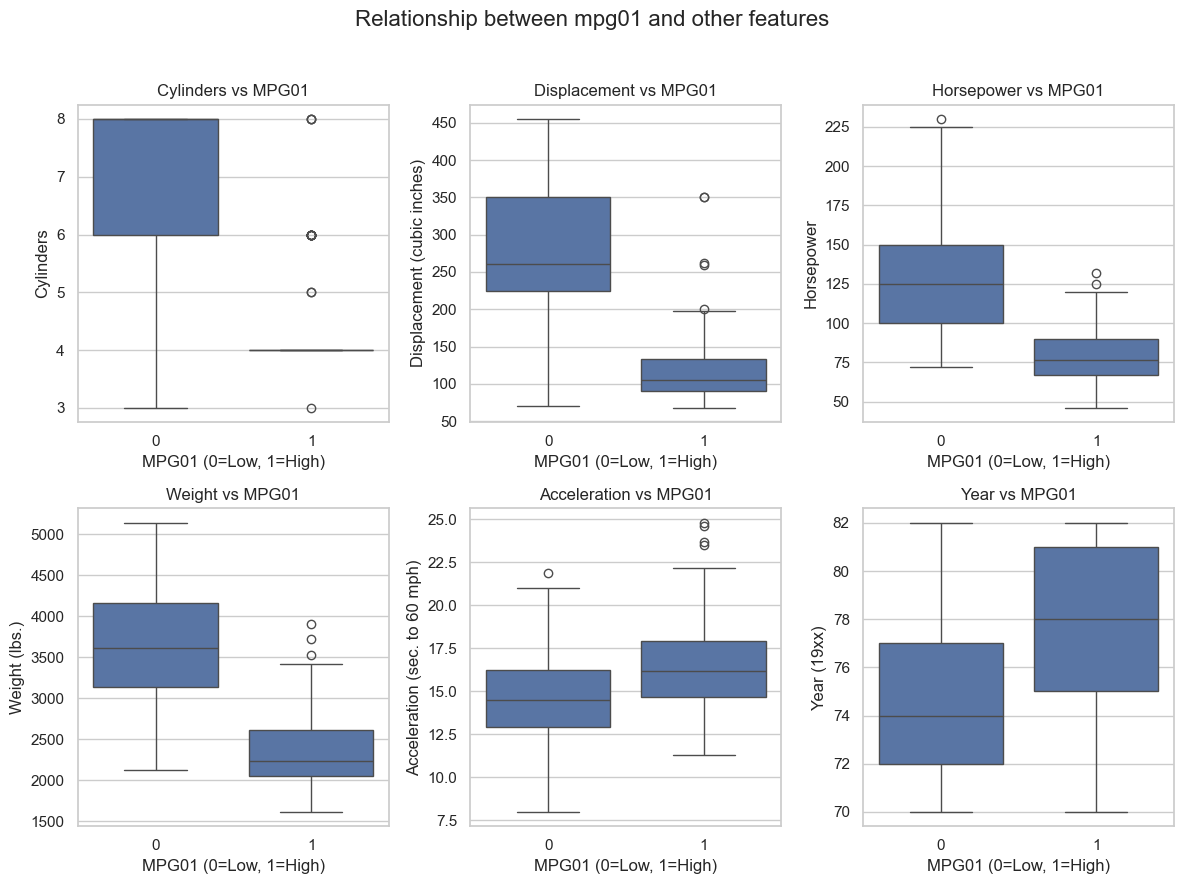

In [35]:
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")
sns.set_palette("deep")

fig, axes = plt.subplots(2, 3, figsize=(12, 9))
fig.suptitle("Relationship between mpg01 and other features", fontsize=16)

# 1. Boxplot of cylinders vs mpg01:
sns.boxplot(x="mpg01", y="cylinders", data=auto, ax=axes[0, 0])
axes[0, 0].set_title("Cylinders vs MPG01")
axes[0, 0].set_xlabel("MPG01 (0=Low, 1=High)")
axes[0, 0].set_ylabel("Cylinders")

# 2. Boxplot of displacement vs mpg01:
sns.boxplot(x="mpg01", y="displacement", data=auto, ax=axes[0, 1])
axes[0, 1].set_title("Displacement vs MPG01")
axes[0, 1].set_xlabel("MPG01 (0=Low, 1=High)")
axes[0, 1].set_ylabel("Displacement (cubic inches)")

# 3. Boxplot of horsepower vs mpg01:
sns.boxplot(x="mpg01", y="horsepower", data=auto, ax=axes[0, 2])
axes[0, 2].set_title("Horsepower vs MPG01")
axes[0, 2].set_xlabel("MPG01 (0=Low, 1=High)")
axes[0, 2].set_ylabel("Horsepower")

# 4. Boxplot of weight vs mpg01:
sns.boxplot(x="mpg01", y="weight", data=auto, ax=axes[1, 0])
axes[1, 0].set_title("Weight vs MPG01")
axes[1, 0].set_xlabel("MPG01 (0=Low, 1=High)")
axes[1, 0].set_ylabel("Weight (lbs.)")

# 5. Boxplot of acceleration vs mpg01:
sns.boxplot(x="mpg01", y="acceleration", data=auto, ax=axes[1, 1])
axes[1, 1].set_title("Acceleration vs MPG01")
axes[1, 1].set_xlabel("MPG01 (0=Low, 1=High)")
axes[1, 1].set_ylabel("Acceleration (sec. to 60 mph)")

# 6. Boxplot of year vs mpg01:
sns.boxplot(x="mpg01", y="year", data=auto, ax=axes[1, 2])
axes[1, 2].set_title("Year vs MPG01")
axes[1, 2].set_xlabel("MPG01 (0=Low, 1=High)")
axes[1, 2].set_ylabel("Year (19xx)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [36]:
auto_numeric = auto.drop(["name"], axis=1)
correlations = auto_numeric.corr()["mpg01"].sort_values(ascending=False)
print("\nCorrelations with mpg01:")
print(correlations)



Correlations with mpg01:
mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64


__14 (c):__ In the following items we will use `cylinders`, `weight` and `displacement` as the predictors.

In [45]:
X = auto[["cylinders", "weight", "displacement"]]
y = auto["mpg01"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Essential for KNN, but to be used in the other models as well:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

__14 (d):__ As computed below, the test error rate for the LDA model using three
predictors is approximately $ 13.6\% $. We begin by writing a generic function
to evaluate the models that will be used on items (d) through (h).

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"\n{model_name} results:")
    print("=" * (len(model_name) + len(" results:")))
    print(f"\nTest accuracy: {accuracy:.4f}")
    print(f"Test error rate: {error_rate:.4f}")
    
    print(f"\nConfusion matrix:")
    print(pd.DataFrame(conf_matrix))
    
    print(f"\nClassification report:")
    print(classification_report(y_true, y_pred))
    
    return error_rate

In [46]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
lda_predictions = lda_model.predict(X_test_scaled)
lda_error = evaluate_model(y_test, lda_predictions, "LDA")


LDA results:

Test accuracy: 0.8644
Test error rate: 0.1356

Confusion matrix:
    0   1
0  45   9
1   7  57

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.86      0.89      0.88        64

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118



__14 (e):__

In [47]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)
qda_predictions = qda_model.predict(X_test_scaled)
qda_error = evaluate_model(y_test, qda_predictions, "QDA")


QDA results:

Test accuracy: 0.8559
Test error rate: 0.1441

Confusion matrix:
    0   1
0  45   9
1   8  56

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.86      0.88      0.87        64

    accuracy                           0.86       118
   macro avg       0.86      0.85      0.85       118
weighted avg       0.86      0.86      0.86       118



__14 (f):__

In [48]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg_model.predict(X_test_scaled)
log_reg_error = evaluate_model(y_test, log_reg_predictions, "Logistic regression")


Logistic regression results:

Test accuracy: 0.8559
Test error rate: 0.1441

Confusion matrix:
    0   1
0  45   9
1   8  56

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.86      0.88      0.87        64

    accuracy                           0.86       118
   macro avg       0.86      0.85      0.85       118
weighted avg       0.86      0.86      0.86       118



__14 (g):__

In [49]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_error = evaluate_model(y_test, nb_predictions, "Gaussian naive Bayes")


Gaussian naive Bayes results:

Test accuracy: 0.8644
Test error rate: 0.1356

Confusion matrix:
    0   1
0  45   9
1   7  57

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.86      0.89      0.88        64

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118



__14 (h):__

In [50]:
ks = range(1, 21, 2)
knn_errors = []
for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, knn_predictions)
    knn_errors.append(error)

best_k_index = np.argmin(knn_errors)
best_k = ks[best_k_index]
best_knn_error = knn_errors[best_k_index]
print(f"The best value of K on the test data is K = {best_k}.")

The best value of K on the test data is K = 3.


In [53]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn.predict(X_test_scaled)
evaluate_model(y_test, y_pred_best_knn, f"KNN (K={best_k})")


KNN (K=3) results:

Test accuracy: 0.8729
Test error rate: 0.1271

Confusion matrix:
    0   1
0  45   9
1   6  58

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.87      0.91      0.89        64

    accuracy                           0.87       118
   macro avg       0.87      0.87      0.87       118
weighted avg       0.87      0.87      0.87       118



0.1271186440677966